# EDA



## Exploring the Data


In [37]:
import polars as pl
import polars.selectors as cs
import sklearn 
import catboost

import warnings
warnings.filterwarnings('ignore')

In [38]:
# King County House Sales dataset from OpenML (includes Seattle)
# this is an ARFF file, which is a text file with a specific format
url = 'https://www.openml.org/data/download/22044765/dataset'
cols = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_year', 'date_month', 'date_day']

raw = pl.read_csv(url, new_columns=cols, skip_rows=31, has_header=False)
raw

shape: (21_613, 23)
┌────────────┬──────────┬──────────┬───────────┬───┬────────────┬───────────┬───────────┬──────────┐
│ id         ┆ price    ┆ bedrooms ┆ bathrooms ┆ … ┆ sqft_lot15 ┆ date_year ┆ date_mont ┆ date_day │
│ ---        ┆ ---      ┆ ---      ┆ ---       ┆   ┆ ---        ┆ ---       ┆ h         ┆ ---      │
│ i64        ┆ f64      ┆ i64      ┆ f64       ┆   ┆ i64        ┆ i64       ┆ ---       ┆ i64      │
│            ┆          ┆          ┆           ┆   ┆            ┆           ┆ i64       ┆          │
╞════════════╪══════════╪══════════╪═══════════╪═══╪════════════╪═══════════╪═══════════╪══════════╡
│ 7129300520 ┆ 221900.0 ┆ 3        ┆ 1.0       ┆ … ┆ 5650       ┆ 2014      ┆ 10        ┆ 13       │
│ 6414100192 ┆ 538000.0 ┆ 3        ┆ 2.25      ┆ … ┆ 7639       ┆ 2014      ┆ 12        ┆ 9        │
│ 5631500400 ┆ 180000.0 ┆ 2        ┆ 1.0       ┆ … ┆ 8062       ┆ 2015      ┆ 2         ┆ 25       │
│ 2487200875 ┆ 604000.0 ┆ 4        ┆ 3.0       ┆ … ┆ 5000       ┆ 2014      ┆ 12        ┆ 9        │
│ 1954400510 ┆ 510000.0 ┆ 3        ┆ 2.0       ┆ … ┆ 7503       ┆ 2015      ┆ 2         ┆ 18       │
│ …          ┆ …        ┆ …        ┆ …         ┆ … ┆ …          ┆ …         ┆ …         ┆ …        │
│ 263000018  ┆ 360000.0 ┆ 3        ┆ 2.5       ┆ … ┆ 1509       ┆ 2014      ┆ 5         ┆ 21       │
│ 6600060120 ┆ 400000.0 ┆ 4        ┆ 2.5       ┆ … ┆ 7200       ┆ 2015      ┆ 2         ┆ 23       │
│ 1523300141 ┆ 402101.0 ┆ 2        ┆ 0.75      ┆ … ┆ 2007       ┆ 2014      ┆ 6         ┆ 23       │
│ 291310100  ┆ 400000.0 ┆ 3        ┆ 2.5       ┆ … ┆ 1287       ┆ 2015      ┆ 1         ┆ 16       │
│ 1523300157 ┆ 325000.0 ┆ 2        ┆ 0.75      ┆ … ┆ 1357       ┆ 2014      ┆ 10        ┆ 15       │
└────────────┴──────────┴──────────┴───────────┴───┴────────────┴───────────┴───────────┴──────────┘

In [39]:
raw.describe()

shape: (9, 24)
┌───────────┬───────────┬───────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ statistic ┆ id        ┆ price     ┆ bedrooms ┆ … ┆ sqft_lot1 ┆ date_year ┆ date_mont ┆ date_day  │
│ ---       ┆ ---       ┆ ---       ┆ ---      ┆   ┆ 5         ┆ ---       ┆ h         ┆ ---       │
│ str       ┆ f64       ┆ f64       ┆ f64      ┆   ┆ ---       ┆ f64       ┆ ---       ┆ f64       │
│           ┆           ┆           ┆          ┆   ┆ f64       ┆           ┆ f64       ┆           │
╞═══════════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count     ┆ 21613.0   ┆ 21613.0   ┆ 21613.0  ┆ … ┆ 21613.0   ┆ 21613.0   ┆ 21613.0   ┆ 21613.0   │
│ null_coun ┆ 0.0       ┆ 0.0       ┆ 0.0      ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ t         ┆           ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ mean      ┆ 4.5803e9  ┆ 540088.14 ┆ 3.370842 ┆ … ┆ 12768.455 ┆ 2014.3229 ┆ 6.574423  ┆ 15.688197 │
│           ┆           ┆ 1767      ┆          ┆   ┆ 652       ┆ 54        ┆           ┆           │
│ std       ┆ 2.8766e9  ┆ 367127.19 ┆ 0.930062 ┆ … ┆ 27304.179 ┆ 0.467616  ┆ 3.115308  ┆ 8.635063  │
│           ┆           ┆ 6483      ┆          ┆   ┆ 631       ┆           ┆           ┆           │
│ min       ┆ 1.000102e ┆ 75000.0   ┆ 0.0      ┆ … ┆ 651.0     ┆ 2014.0    ┆ 1.0       ┆ 1.0       │
│           ┆ 6         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 25%       ┆ 2.1230e9  ┆ 321950.0  ┆ 3.0      ┆ … ┆ 5100.0    ┆ 2014.0    ┆ 4.0       ┆ 8.0       │
│ 50%       ┆ 3.9049e9  ┆ 450000.0  ┆ 3.0      ┆ … ┆ 7620.0    ┆ 2014.0    ┆ 6.0       ┆ 16.0      │
│ 75%       ┆ 7.3089e9  ┆ 645000.0  ┆ 4.0      ┆ … ┆ 10083.0   ┆ 2015.0    ┆ 9.0       ┆ 23.0      │
│ max       ┆ 9.9000e9  ┆ 7.7e6     ┆ 33.0     ┆ … ┆ 871200.0  ┆ 2015.0    ┆ 12.0      ┆ 31.0      │
└───────────┴───────────┴───────────┴──────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [40]:
raw.corr()

shape: (23, 23)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ price     ┆ bedrooms  ┆ bathrooms ┆ … ┆ sqft_lot1 ┆ date_year ┆ date_mont ┆ date_day │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ 5         ┆ ---       ┆ h         ┆ ---      │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ f64       ┆ ---       ┆ f64      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆           ┆ f64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 1.0       ┆ -0.016762 ┆ 0.001286  ┆ 0.00516   ┆ … ┆ -0.138798 ┆ 0.010128  ┆ -0.011708 ┆ 0.001939 │
│ -0.016762 ┆ 1.0       ┆ 0.30835   ┆ 0.525138  ┆ … ┆ 0.082447  ┆ 0.003576  ┆ -0.010081 ┆ -0.01467 │
│ 0.001286  ┆ 0.30835   ┆ 1.0       ┆ 0.515884  ┆ … ┆ 0.029244  ┆ -0.009838 ┆ -0.001533 ┆ -0.00803 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ 0.00516   ┆ 0.525138  ┆ 0.515884  ┆ 1.0       ┆ … ┆ 0.087175  ┆ -0.026596 ┆ 0.007392  ┆ -0.00530 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 4        │
│ -0.012258 ┆ 0.702035  ┆ 0.576671  ┆ 0.754665  ┆ … ┆ 0.183286  ┆ -0.029038 ┆ 0.01181   ┆ -0.00724 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 6        │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ -0.002901 ┆ 0.585379  ┆ 0.391638  ┆ 0.568634  ┆ … ┆ 0.183192  ┆ -0.021734 ┆ 0.002449  ┆ -0.00853 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 9        │
│ -0.138798 ┆ 0.082447  ┆ 0.029244  ┆ 0.087175  ┆ … ┆ 1.0       ┆ -0.000085 ┆ 0.003546  ┆ -0.00287 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ 0.010128  ┆ 0.003576  ┆ -0.009838 ┆ -0.026596 ┆ … ┆ -0.000085 ┆ 1.0       ┆ -0.782389 ┆ -0.00610 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 3        │
│ -0.011708 ┆ -0.010081 ┆ -0.001533 ┆ 0.007392  ┆ … ┆ 0.003546  ┆ -0.782389 ┆ 1.0       ┆ -0.06066 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 4        │
│ 0.001939  ┆ -0.01467  ┆ -0.008031 ┆ -0.005304 ┆ … ┆ -0.002871 ┆ -0.006103 ┆ -0.060664 ┆ 1.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [41]:
(raw
 .to_pandas(use_pyarrow_extension_array=True)
 .corr()
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

In [42]:
(raw
 .plot.scatter('sqft_living', 'price', alpha=0.1)
)

:Scatter   [sqft_living]   (price)

In [43]:
(raw
 .group_by('date_month', 'zipcode')
 .agg(pl.col('price').mean())
 .plot.line('date_month', 'price', by='zipcode')
 )

:NdOverlay   [zipcode]
   :Curve   [date_month]   (price)

In [ ]:
#sorting it by month
(raw
 .group_by('date_month', 'zipcode')
 .agg(pl.col('price').mean())
 .sort('date_month')
 .plot.line('date_month', 'price', by='zipcode', alpha=0.5)
 )

:NdOverlay   [zipcode]
   :Curve   [date_month]   (price)

In [45]:
# lat/long scatter plot
(raw
 .sort('price')
 .plot.scatter(x='long', y='lat', alpha=0.5, c='price', s=1)
)

:Scatter   [long]   (lat,price)

In [46]:
# lat/long scatter plot
(raw
 .filter(pl.col('price') > 1_000_000)
 .sort('price')
 .plot.scatter(x='long', y='lat', alpha=0.5, c='price', s=1)
)

:Scatter   [long]   (lat,price)


## Challenge

Make a plot to explore the relationship between the number of bedrooms and the price of the house.

In [68]:
(raw
 .plot.scatter('bedrooms', 'price', alpha=0.1)
)

:Scatter   [bedrooms]   (price)


## Data Preprocessing


In [ ]:
# Converting zipcode as a categorical feature and creating a new feature called date and 
# handling 0s in renovated year feature 
def tweak_housing(df):
    return (df
            .with_columns(zipcode=pl.col('zipcode').cast(pl.String).cast(pl.Categorical),
                          date=pl.date(pl.col('date_year'), pl.col('date_month'), pl.col('date_day')),
                          yr_renovated=pl.col('yr_renovated').replace(0, None),
                          )
            .select(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                     'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
                     'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 
                     'sqft_lot15', 'date',  #'date_year', 'date_month', 'date_day', 
                     ])
    )

tweak_housing(raw)
    

shape: (21_613, 21)
┌────────────┬──────────┬──────────┬───────────┬───┬──────────┬────────────┬───────────┬───────────┐
│ id         ┆ price    ┆ bedrooms ┆ bathrooms ┆ … ┆ long     ┆ sqft_livin ┆ sqft_lot1 ┆ date      │
│ ---        ┆ ---      ┆ ---      ┆ ---       ┆   ┆ ---      ┆ g15        ┆ 5         ┆ ---       │
│ i64        ┆ f64      ┆ i64      ┆ f64       ┆   ┆ f64      ┆ ---        ┆ ---       ┆ date      │
│            ┆          ┆          ┆           ┆   ┆          ┆ i64        ┆ i64       ┆           │
╞════════════╪══════════╪══════════╪═══════════╪═══╪══════════╪════════════╪═══════════╪═══════════╡
│ 7129300520 ┆ 221900.0 ┆ 3        ┆ 1.0       ┆ … ┆ -122.257 ┆ 1340       ┆ 5650      ┆ 2014-10-1 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 3         │
│ 6414100192 ┆ 538000.0 ┆ 3        ┆ 2.25      ┆ … ┆ -122.319 ┆ 1690       ┆ 7639      ┆ 2014-12-0 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 9         │
│ 5631500400 ┆ 180000.0 ┆ 2        ┆ 1.0       ┆ … ┆ -122.233 ┆ 2720       ┆ 8062      ┆ 2015-02-2 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 5         │
│ 2487200875 ┆ 604000.0 ┆ 4        ┆ 3.0       ┆ … ┆ -122.393 ┆ 1360       ┆ 5000      ┆ 2014-12-0 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 9         │
│ 1954400510 ┆ 510000.0 ┆ 3        ┆ 2.0       ┆ … ┆ -122.045 ┆ 1800       ┆ 7503      ┆ 2015-02-1 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 8         │
│ …          ┆ …        ┆ …        ┆ …         ┆ … ┆ …        ┆ …          ┆ …         ┆ …         │
│ 263000018  ┆ 360000.0 ┆ 3        ┆ 2.5       ┆ … ┆ -122.346 ┆ 1530       ┆ 1509      ┆ 2014-05-2 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 1         │
│ 6600060120 ┆ 400000.0 ┆ 4        ┆ 2.5       ┆ … ┆ -122.362 ┆ 1830       ┆ 7200      ┆ 2015-02-2 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 3         │
│ 1523300141 ┆ 402101.0 ┆ 2        ┆ 0.75      ┆ … ┆ -122.299 ┆ 1020       ┆ 2007      ┆ 2014-06-2 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 3         │
│ 291310100  ┆ 400000.0 ┆ 3        ┆ 2.5       ┆ … ┆ -122.069 ┆ 1410       ┆ 1287      ┆ 2015-01-1 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 6         │
│ 1523300157 ┆ 325000.0 ┆ 2        ┆ 0.75      ┆ … ┆ -122.299 ┆ 1020       ┆ 1357      ┆ 2014-10-1 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 5         │
└────────────┴──────────┴──────────┴───────────┴───┴──────────┴────────────┴───────────┴───────────┘


## Sklearn Pipelines


In [48]:
# The difference between sklearn pipelines and transformers is 
# that a pipeline is a sequence of steps. A transformer transforms
# the data, and a pipeline is a sequence of transformers.
# A ColumnTransformer applies multiple transformers to different
# columns of the input data.

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config
set_config(transform_output='polars')

In [49]:
print(tweak_housing(raw).select(cs.numeric()).columns)

['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [50]:
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living']
std = StandardScaler()
std.fit_transform(tweak_housing(raw).select(numeric_features))

shape: (21_613, 3)
┌───────────┬───────────┬─────────────┐
│ bedrooms  ┆ bathrooms ┆ sqft_living │
│ ---       ┆ ---       ┆ ---         │
│ f64       ┆ f64       ┆ f64         │
╞═══════════╪═══════════╪═════════════╡
│ -0.398737 ┆ -1.447464 ┆ -0.979835   │
│ -0.398737 ┆ 0.175607  ┆ 0.533634    │
│ -1.473959 ┆ -1.447464 ┆ -1.426254   │
│ 0.676485  ┆ 1.149449  ┆ -0.13055    │
│ -0.398737 ┆ -0.149007 ┆ -0.435422   │
│ …         ┆ …         ┆ …           │
│ -0.398737 ┆ 0.500221  ┆ -0.598746   │
│ 0.676485  ┆ 0.500221  ┆ 0.250539    │
│ -1.473959 ┆ -1.772078 ┆ -1.154047   │
│ -0.398737 ┆ 0.500221  ┆ -0.522528   │
│ -1.473959 ┆ -1.772078 ┆ -1.154047   │
└───────────┴───────────┴─────────────┘

In [52]:
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living']

num_pipeline = Pipeline([
     ('std', StandardScaler())])

num_pipeline.fit_transform(
    tweak_housing(raw)
    .select(numeric_features)
)

shape: (21_613, 3)
┌───────────┬───────────┬─────────────┐
│ bedrooms  ┆ bathrooms ┆ sqft_living │
│ ---       ┆ ---       ┆ ---         │
│ f64       ┆ f64       ┆ f64         │
╞═══════════╪═══════════╪═════════════╡
│ -0.398737 ┆ -1.447464 ┆ -0.979835   │
│ -0.398737 ┆ 0.175607  ┆ 0.533634    │
│ -1.473959 ┆ -1.447464 ┆ -1.426254   │
│ 0.676485  ┆ 1.149449  ┆ -0.13055    │
│ -0.398737 ┆ -0.149007 ┆ -0.435422   │
│ …         ┆ …         ┆ …           │
│ -0.398737 ┆ 0.500221  ┆ -0.598746   │
│ 0.676485  ┆ 0.500221  ┆ 0.250539    │
│ -1.473959 ┆ -1.772078 ┆ -1.154047   │
│ -0.398737 ┆ 0.500221  ┆ -0.522528   │
│ -1.473959 ┆ -1.772078 ┆ -1.154047   │
└───────────┴───────────┴─────────────┘

In [ ]:
# add another step of imputing with median values
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std', StandardScaler())])

num_pipeline.fit_transform(
    tweak_housing(raw)
    .select(numeric_features)
)

shape: (21_613, 3)
┌───────────┬───────────┬─────────────┐
│ bedrooms  ┆ bathrooms ┆ sqft_living │
│ ---       ┆ ---       ┆ ---         │
│ f64       ┆ f64       ┆ f64         │
╞═══════════╪═══════════╪═════════════╡
│ -0.398737 ┆ -1.447464 ┆ -0.979835   │
│ -0.398737 ┆ 0.175607  ┆ 0.533634    │
│ -1.473959 ┆ -1.447464 ┆ -1.426254   │
│ 0.676485  ┆ 1.149449  ┆ -0.13055    │
│ -0.398737 ┆ -0.149007 ┆ -0.435422   │
│ …         ┆ …         ┆ …           │
│ -0.398737 ┆ 0.500221  ┆ -0.598746   │
│ 0.676485  ┆ 0.500221  ┆ 0.250539    │
│ -1.473959 ┆ -1.772078 ┆ -1.154047   │
│ -0.398737 ┆ 0.500221  ┆ -0.522528   │
│ -1.473959 ┆ -1.772078 ┆ -1.154047   │
└───────────┴───────────┴─────────────┘

In [ ]:
cat_features = ['zipcode']

ohe = OneHotEncoder(handle_unknown='ignore', 
                    sparse_output=False)

ohe.fit_transform(
    tweak_housing(raw)
    .select(cat_features)
)

shape: (21_613, 70)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ zipcode_9 ┆ zipcode_9 ┆ zipcode_9 ┆ zipcode_9 ┆ … ┆ zipcode_9 ┆ zipcode_9 ┆ zipcode_9 ┆ zipcode_ │
│ 8001      ┆ 8002      ┆ 8003      ┆ 8004      ┆   ┆ 8178      ┆ 8188      ┆ 8198      ┆ 98199    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 1.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [55]:
cat_features = ['zipcode']

ohe = OneHotEncoder(handle_unknown='ignore',
                    sparse_output=False, max_categories=10)

ohe.fit_transform(
    tweak_housing(raw)
    .select(cat_features)
)

shape: (21_613, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ zipcode_9 ┆ zipcode_9 ┆ zipcode_9 ┆ zipcode_9 ┆ … ┆ zipcode_9 ┆ zipcode_9 ┆ zipcode_9 ┆ zipcode_ │
│ 8023      ┆ 8034      ┆ 8038      ┆ 8042      ┆   ┆ 8115      ┆ 8117      ┆ 8118      ┆ infreque │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ nt_sklea │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ rn       │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [56]:
cat_features = ['zipcode']

cat_pipeline = Pipeline(steps=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

cat_pipeline.set_params(cat__max_categories=10)
cat_pipeline.fit_transform(
    tweak_housing(raw)
    .select(cat_features)
)

shape: (21_613, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ zipcode_9 ┆ zipcode_9 ┆ zipcode_9 ┆ zipcode_9 ┆ … ┆ zipcode_9 ┆ zipcode_9 ┆ zipcode_9 ┆ zipcode_ │
│ 8023      ┆ 8034      ┆ 8038      ┆ 8042      ┆   ┆ 8115      ┆ 8117      ┆ 8118      ┆ infreque │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ nt_sklea │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ rn       │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
│ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 1.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [57]:
# transformer from a function
tweak_transformer = FunctionTransformer(tweak_housing)

tweak_transformer.fit_transform(raw)

shape: (21_613, 21)
┌────────────┬──────────┬──────────┬───────────┬───┬──────────┬────────────┬───────────┬───────────┐
│ id         ┆ price    ┆ bedrooms ┆ bathrooms ┆ … ┆ long     ┆ sqft_livin ┆ sqft_lot1 ┆ date      │
│ ---        ┆ ---      ┆ ---      ┆ ---       ┆   ┆ ---      ┆ g15        ┆ 5         ┆ ---       │
│ i64        ┆ f64      ┆ i64      ┆ f64       ┆   ┆ f64      ┆ ---        ┆ ---       ┆ date      │
│            ┆          ┆          ┆           ┆   ┆          ┆ i64        ┆ i64       ┆           │
╞════════════╪══════════╪══════════╪═══════════╪═══╪══════════╪════════════╪═══════════╪═══════════╡
│ 7129300520 ┆ 221900.0 ┆ 3        ┆ 1.0       ┆ … ┆ -122.257 ┆ 1340       ┆ 5650      ┆ 2014-10-1 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 3         │
│ 6414100192 ┆ 538000.0 ┆ 3        ┆ 2.25      ┆ … ┆ -122.319 ┆ 1690       ┆ 7639      ┆ 2014-12-0 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 9         │
│ 5631500400 ┆ 180000.0 ┆ 2        ┆ 1.0       ┆ … ┆ -122.233 ┆ 2720       ┆ 8062      ┆ 2015-02-2 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 5         │
│ 2487200875 ┆ 604000.0 ┆ 4        ┆ 3.0       ┆ … ┆ -122.393 ┆ 1360       ┆ 5000      ┆ 2014-12-0 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 9         │
│ 1954400510 ┆ 510000.0 ┆ 3        ┆ 2.0       ┆ … ┆ -122.045 ┆ 1800       ┆ 7503      ┆ 2015-02-1 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 8         │
│ …          ┆ …        ┆ …        ┆ …         ┆ … ┆ …        ┆ …          ┆ …         ┆ …         │
│ 263000018  ┆ 360000.0 ┆ 3        ┆ 2.5       ┆ … ┆ -122.346 ┆ 1530       ┆ 1509      ┆ 2014-05-2 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 1         │
│ 6600060120 ┆ 400000.0 ┆ 4        ┆ 2.5       ┆ … ┆ -122.362 ┆ 1830       ┆ 7200      ┆ 2015-02-2 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 3         │
│ 1523300141 ┆ 402101.0 ┆ 2        ┆ 0.75      ┆ … ┆ -122.299 ┆ 1020       ┆ 2007      ┆ 2014-06-2 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 3         │
│ 291310100  ┆ 400000.0 ┆ 3        ┆ 2.5       ┆ … ┆ -122.069 ┆ 1410       ┆ 1287      ┆ 2015-01-1 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 6         │
│ 1523300157 ┆ 325000.0 ┆ 2        ┆ 0.75      ┆ … ┆ -122.299 ┆ 1020       ┆ 1357      ┆ 2014-10-1 │
│            ┆          ┆          ┆           ┆   ┆          ┆            ┆           ┆ 5         │
└────────────┴──────────┴──────────┴───────────┴───┴──────────┴────────────┴───────────┴───────────┘

In [58]:
categorical_features = ['zipcode']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

ct = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore',
                              sparse_output=False), categorical_features)])

ct.fit_transform(
    tweak_housing(raw)
    .select([*numeric_features, *cat_features])
)

shape: (21_613, 73)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ num__bedr ┆ num__bath ┆ num__sqft ┆ cat__zipc ┆ … ┆ cat__zipc ┆ cat__zipc ┆ cat__zipc ┆ cat__zip │
│ ooms      ┆ rooms     ┆ _living   ┆ ode_98001 ┆   ┆ ode_98178 ┆ ode_98188 ┆ ode_98198 ┆ code_981 │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ 99       │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ -0.398737 ┆ -1.447464 ┆ -0.979835 ┆ 0.0       ┆ … ┆ 1.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -0.398737 ┆ 0.175607  ┆ 0.533634  ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -1.473959 ┆ -1.447464 ┆ -1.426254 ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.676485  ┆ 1.149449  ┆ -0.13055  ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -0.398737 ┆ -0.149007 ┆ -0.435422 ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ -0.398737 ┆ 0.500221  ┆ -0.598746 ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.676485  ┆ 0.500221  ┆ 0.250539  ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -1.473959 ┆ -1.772078 ┆ -1.154047 ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -0.398737 ┆ 0.500221  ┆ -0.522528 ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -1.473959 ┆ -1.772078 ┆ -1.154047 ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [ ]:
# Custom transformer - Average price for each zipcode
class ZipAvgPriceAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        # assume X is a polars dataframe
        self.zip_avg_price = (X
                              .group_by('zipcode')
                              .agg(zip_mean=pl.col('price').mean())
        )
        return self
    
    def transform(self, X, y=None):
        return X.join(self.zip_avg_price, on='zipcode')

zip_adder = ZipAvgPriceAdder()
zip_adder.fit_transform(raw.select(['zipcode', 'price']))

shape: (21_613, 3)
┌─────────┬──────────┬───────────────┐
│ zipcode ┆ price    ┆ zip_mean      │
│ ---     ┆ ---      ┆ ---           │
│ i64     ┆ f64      ┆ f64           │
╞═════════╪══════════╪═══════════════╡
│ 98178   ┆ 221900.0 ┆ 310612.755725 │
│ 98125   ┆ 538000.0 ┆ 469455.770732 │
│ 98028   ┆ 180000.0 ┆ 462480.035336 │
│ 98136   ┆ 604000.0 ┆ 551688.673004 │
│ 98074   ┆ 510000.0 ┆ 685605.77551  │
│ …       ┆ …        ┆ …             │
│ 98103   ┆ 360000.0 ┆ 584919.210963 │
│ 98146   ┆ 400000.0 ┆ 359483.239583 │
│ 98144   ┆ 402101.0 ┆ 594547.650146 │
│ 98027   ┆ 400000.0 ┆ 616990.592233 │
│ 98144   ┆ 325000.0 ┆ 594547.650146 │
└─────────┴──────────┴───────────────┘

In [63]:
# make the actual pipeline
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
                    'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                    'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zip_mean']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['zipcode']

categorical_transformer = Pipeline(steps=[
    ('one', OneHotEncoder(handle_unknown='ignore',
                              sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

tweak_transformer = FunctionTransformer(tweak_housing)

class ZipAvgPriceAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        # assume X is a polars dataframe
        self.zip_avg_price = (X
                              .group_by('zipcode')
                              .agg(zip_mean=pl.col('price').mean())
        )
        return self
    
    def transform(self, X, y=None):
        return X.join(self.zip_avg_price, on='zipcode')

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                      ])

X = raw #.drop('price')
y = raw.select('price') # Note sklearn wants a Polars dataframe for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe.fit_transform(raw, raw.select('price'))

shape: (21_613, 88)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ num__bedr ┆ num__bath ┆ num__sqft ┆ num__sqft ┆ … ┆ cat__zipc ┆ cat__zipc ┆ cat__zipc ┆ cat__zip │
│ ooms      ┆ rooms     ┆ _living   ┆ _lot      ┆   ┆ ode_98178 ┆ ode_98188 ┆ ode_98198 ┆ code_981 │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ 99       │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ -0.398737 ┆ -1.447464 ┆ -0.979835 ┆ -0.228321 ┆ … ┆ 1.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -0.398737 ┆ 0.175607  ┆ 0.533634  ┆ -0.189885 ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -1.473959 ┆ -1.447464 ┆ -1.426254 ┆ -0.123298 ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.676485  ┆ 1.149449  ┆ -0.13055  ┆ -0.244014 ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -0.398737 ┆ -0.149007 ┆ -0.435422 ┆ -0.169653 ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ -0.398737 ┆ 0.500221  ┆ -0.598746 ┆ -0.337424 ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ 0.676485  ┆ 0.500221  ┆ 0.250539  ┆ -0.224386 ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -1.473959 ┆ -1.772078 ┆ -1.154047 ┆ -0.332137 ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -0.398737 ┆ 0.500221  ┆ -0.522528 ┆ -0.307076 ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ -1.473959 ┆ -1.772078 ┆ -1.154047 ┆ -0.338752 ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [64]:
pipe

Pipeline(steps=[('tweak',
                 FunctionTransformer(func=<function tweak_housing at 0x77e1e6df40e0>)),
                ('zip_avg_price', ZipAvgPriceAdder()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15', 'zip_mean']),
                                                 ('cat',
                                                  Pipeline(steps=[('one',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['zipcode'])]))])

In [65]:
# Note sklearn wants a Polars dataframe for y
X = raw #.drop('price')
y = raw.select('price') 
#y = raw['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation



## Dummy Model


In [69]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
dummy_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                      ('dummy', dummy),
                      ])

dummy_pipe.fit(X_train, y_train)
dummy_pipe.score(X_test, y_test)

-0.000889991449168015

In [70]:
dummy_pipe

Pipeline(steps=[('tweak',
                 FunctionTransformer(func=<function tweak_housing at 0x77e1e6df40e0>)),
                ('zip_avg_price', ZipAvgPriceAdder()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15', 'zip_mean']),
                                                 ('cat',
                                                  Pipeline(steps=[('one',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['zipcode'])])),
                ('dummy', DummyRegressor())])

In [71]:
dummy_pipe.predict(X_test)

array([537768.04794679, 537768.04794679, 537768.04794679, ...,
       537768.04794679, 537768.04794679, 537768.04794679])


## Linear Regression


In [72]:
from sklearn.linear_model import LinearRegression


lr =  LinearRegression()
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
lr_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                        ('lr', lr),
                      ])

lr_pipe.fit(X_train, y_train)
lr_pipe.score(X_test, y_test)

0.806993671862066

In [73]:
lr_pipe.predict(X_test)

array([[ 371616.],
       [ 828514.],
       [1240944.],
       ...,
       [ 380892.],
       [ 665852.],
       [ 384176.]])


## Decision Trees


In [74]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
dt_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                      ('dt', dt),
                      ])

dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)

0.726333961982794

In [75]:
dt_pipe.set_params(dt__max_depth=1)
dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)

0.31051544204266734

In [76]:
dt_pipe.set_params(dt__max_depth=9)
dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)

0.7423421264338994


## CatBoost


In [77]:
from catboost import CatBoostRegressor


cat = CatBoostRegressor()
# has issues with Polars input going to use a pandas_transformer
def to_pandas(df):
    return df.to_pandas()
pandas_transformer = FunctionTransformer(to_pandas)

y = raw.select('price')

X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
cat_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                      ('to_pandas', pandas_transformer),
                      ('cat', cat), 
                      ])

cat_pipe.fit(X_train, y_train.to_numpy()[:,0])
cat_pipe.score(X_test, y_test.to_numpy()[:,0])

Learning rate set to 0.064232
0:	learn: 346982.2594620	total: 51.9ms	remaining: 51.8s
1:	learn: 332378.5598059	total: 55.8ms	remaining: 27.9s
2:	learn: 319502.6617458	total: 60.3ms	remaining: 20s
3:	learn: 307490.7902475	total: 63.7ms	remaining: 15.9s
4:	learn: 294940.3225791	total: 67.5ms	remaining: 13.4s
5:	learn: 283907.9796375	total: 71.3ms	remaining: 11.8s
6:	learn: 273592.5548762	total: 74.8ms	remaining: 10.6s
7:	learn: 263472.9134855	total: 78.6ms	remaining: 9.75s
8:	learn: 254884.3331936	total: 82.4ms	remaining: 9.08s
9:	learn: 246261.9209853	total: 86.1ms	remaining: 8.52s
10:	learn: 238183.5765242	total: 90ms	remaining: 8.09s
11:	learn: 230600.1564374	total: 93.7ms	remaining: 7.71s
12:	learn: 223779.4367347	total: 98.3ms	remaining: 7.46s
13:	learn: 217021.8170437	total: 108ms	remaining: 7.6s
14:	learn: 210875.7711670	total: 116ms	remaining: 7.63s
15:	learn: 205122.1910805	total: 127ms	remaining: 7.79s
16:	learn: 199643.2642325	total: 133ms	remaining: 7.71s
17:	learn: 194468.66

0.9046473600451286


## Challenge

Create a pipeline for a Random Forest model and train it on the data. (see `ensemble.RandomForestRegressor` in scikit-learn). What is the score?

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
rf_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                          ('zip_avg_price', ZipAvgPriceAdder()),
                          ('preprocessor', preprocessor),
                          ('rf', rf),])

rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_test, y_test)

0.8764214515898561

In [ ]:
rf_pipe.set_params(rf__n_estimators=20)
rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_test, y_test)

In [ ]:
rf_pipe.set_params(rf__n_estimators=10)
rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_test, y_test)

# Evaluation



## R2


The Coefficient of Determination, R2, is a measure of how well the model fits the data. It is a value between 0 and 1. It tells us how much of the variance in the target variable is predictable from the features.

A value of 0 means that the model explains none of the variability. A value of 1 means that the model explains all the variability.

Note that it doesn't indicate whether a model is overfitting or underfitting the data.

In [79]:
cat_pipe.score(X_test, y_test.to_numpy()[:,0])

0.9046473600451286

In [93]:
r2_score(y_test, cat_pipe.predict(X_test))

0.9046473600451286


## Mean Squared/Absolute Error


In [83]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, cat_pipe.predict(X_test))

14415098613.389244

In [84]:
# rmse
mean_squared_error(y_test, cat_pipe.predict(X_test), squared=False)

120062.89440701171

In [86]:
# absolute error
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, cat_pipe.predict(X_test))

64449.15608948771

In [87]:
# compare to lr model
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, lr_pipe.predict(X_test))

98981.6365949572


## Residuals Plot


Text(0.5, 1.0, 'Residual plot')

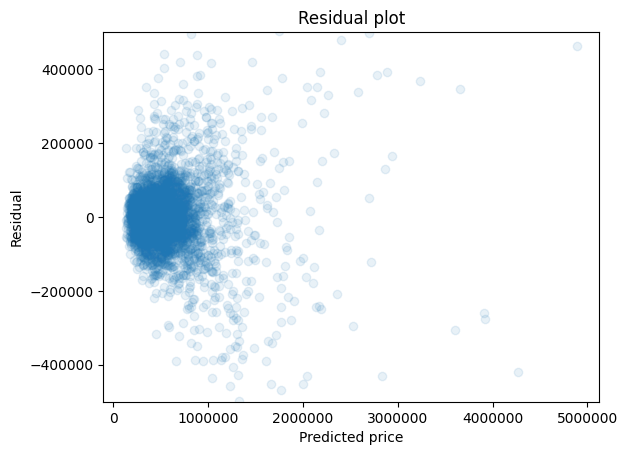

In [89]:
# make a residual plot
import matplotlib.pyplot as plt

ax = plt.scatter(cat_pipe.predict(X_test), 
    y_test.to_series().to_numpy() - cat_pipe.predict(X_test), alpha=0.1)
# make labels not be scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.ylim(-500_000, 500_000)
plt.xlabel('Predicted price')
plt.ylabel('Residual')
plt.title('Residual plot')

In [90]:
# plot with Polars
(y_test
 .with_columns(predicted_price=cat_pipe.predict(X_test),
   residual=y_test.to_series().to_numpy() - cat_pipe.predict(X_test))
 .plot.scatter('predicted_price', 'residual', alpha=0.1, yformatter='$%.0f',
               xformatter='$%.0f')
 )

:Scatter   [predicted_price]   (residual)

In [91]:
def residuals_plot(model, X_train, y_train, X_test, y_test):
    return (y_test
      .with_columns(prediction=model.predict(X_test),
        residual=y_test.to_series().to_numpy() - model.predict(X_test),
        type=pl.lit('test'))
      .vstack(y_train
        .with_columns(prediction=model.predict(X_train),
          residual=y_train.to_series().to_numpy() - model.predict(X_train),
          type=pl.lit('train'))
              )
      .reverse()
      .plot.scatter('prediction', 'residual', alpha=0.1, yformatter='$%.0f',
                    xformatter='$%.0f', by='type')
 )

residuals_plot(cat_pipe, X_train, y_train, X_test, y_test)

:NdOverlay   [type]
   :Scatter   [prediction]   (residual)

In [92]:
residuals_plot(dt_pipe, X_train, y_train, X_test, y_test)

:NdOverlay   [type]
   :Scatter   [prediction]   (residual)

## Challenge

What is the mean squared error of the Random Forest model? What is the R2 score? What do these values tell us about the model?

In [94]:
rf_pipe.score(X_test, y_test.to_numpy()[:,0])

0.8764214515898561

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, rf_pipe.predict(X_test))

0.8764214515898561

In [96]:
mean_squared_error(y_test, rf_pipe.predict(X_test), squared=False)

136682.83964755907

In [98]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, rf_pipe.predict(X_test))

71089.88203472017

# Model Tuning



## Hyperparameters

Hyperparameters are the levers we can pull to adjust the behavior of a model. They are set before the model is trained and remain constant during training.


## Tuning Linear Regression


In [99]:
lr_pipe

Pipeline(steps=[('tweak',
                 FunctionTransformer(func=<function tweak_housing at 0x77e1e6df40e0>)),
                ('zip_avg_price', ZipAvgPriceAdder()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15', 'zip_mean']),
                                                 ('cat',
                                                  Pipeline(steps=[('one',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['zipcode'])])),
                ('lr', LinearRegression())])

In [100]:
lr_pipe.named_steps['lr']

LinearRegression()

In [101]:
help(lr_pipe.named_steps['lr'])

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speed

In [102]:
from sklearn.linear_model import Ridge
Ridge?

Init signature:
Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    copy_X=True,
    max_iter=None,
    tol=0.0001,
    solver='auto',
    positive=False,
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Constant that multiplies the L2 term, controlling regularization
    strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.

    When `alpha = 0`, the objective is equivalent to ordinary least
    s

In [103]:
rr =  Ridge()
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
rr_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                        ('rr', rr),
                      ])

rr_pipe.fit(X_train, y_train)
rr_pipe.score(X_test, y_test)

0.8069369231230312

In [104]:
lr_pipe.score(X_test, y_test)

0.806993671862066

In [105]:
from sklearn.model_selection import validation_curve

param_range = [0, .01, .05, .1, .5, 1, 2]
scores = []
for val in param_range:
    rr_pipe.set_params(rr__alpha=val)
    rr_pipe.fit(X_train, y_train)
    scores.append(rr_pipe.score(X_test, y_test))

In [106]:
# Our be score is at 0 (which is normal Linear Regression)
alpha = pl.DataFrame({'val': param_range,
              'scores': scores})
alpha.plot(x='val', y='scores')

:Curve   [val]   (scores)


## Tuning Decision Trees


In [107]:
dt_pipe.named_steps['dt']

DecisionTreeRegressor(max_depth=9)

In [108]:
help(dt_pipe.named_steps['dt'])

Help on DecisionTreeRegressor in module sklearn.tree._classes object:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree regressor.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Fr

In [109]:
# plot a validation curve tracking mse as the max_depth of the decision tree increases
from sklearn.model_selection import validation_curve

param_range = range(1, 20)
train_scores, test_scores = validation_curve(
    dt_pipe, X_train, y_train, param_name="dt__max_depth", param_range=param_range,
    scoring="neg_mean_squared_error", n_jobs=1)

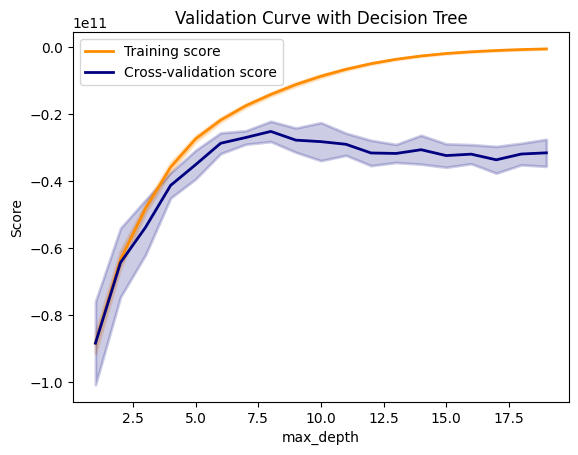

In [110]:
# make a validation curve from train_scores and test_scores
import matplotlib.pyplot as plt
import numpy as np

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
#plt.ylim(-1, 0)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                color="navy", lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,   
                    test_scores_mean + test_scores_std, alpha=0.2,
                    color="navy", lw=lw)
plt.legend(loc="best")




In [111]:
# train dt_pipe with max_depth=8
dt8_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                        ('zip_avg_price', ZipAvgPriceAdder()),
                        ('to_pandas', pandas_transformer),
                        ('preprocessor', preprocessor),
                        ('dt', DecisionTreeRegressor(max_depth=8)),
                        ])

dt8_pipe.fit(X_train, y_train)
dt8_pipe.score(X_test, y_test)

0.730463735758603

In [112]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dt8_pipe.predict(X_test), squared=False) 

201860.3632762255

In [113]:
dt_pipe.score(X_test, y_test)

0.7423421264338994

In [114]:
mean_squared_error(y_test, dt_pipe.predict(X_test), squared=False) 

197362.28163662864


## Tuning CatBoost

* Boosting - `iterations` (`num_trees`, `n_estimators`), `learning_rate` (`eta`), `early_stopping_rounds`

* Tree based - `depth` (`max_depth`), `grow_policy`, `min_child_samples` (`min_data_in_leaf`), `max_leaves` (`num_leaves`)

* Sampling - `subsample`, `sampling_frequency`, `rsm` (`colsample_bylevel`), `random_strength`, `bagging_temperature`

* Regularization - `l2_leaf_reg` (`reg_lambda`), `model_shrink_rate`

* Constraints - `monotone_constraints`, `feature_weights`

In [115]:
catboost.CatBoostRegressor?

Init signature:
catboost.CatBoostRegressor(
    iterations=None,
    learning_rate=None,
    depth=None,
    l2_leaf_reg=None,
    model_size_reg=None,
    rsm=None,
    loss_function='RMSE',
    border_count=None,
    feature_border_type=None,
    per_float_feature_quantization=None,
    input_borders=None,
    output_borders=None,
    fold_permutation_block=None,
    od_pval=None,
    od_wait=None,
    od_type=None,
    nan_mode=None,
    counter_calc_method=None,
    leaf_estimation_iterations=None,
    leaf_estimation_method=None,
    thread_count=None,
    random_seed=None,
    use_best_model=None,
    best_model_min_trees=None,
    verbose=None,
    silent=None,
    logging_level=None,
    metric_period=None,
    ctr_leaf_count_limit=None,
    store_all_simple_ctr=None,
    max_ctr_complexity=None,
    has_time=None,
    allow_const_label=None,
    target_border=None,
    one_hot_max_size=None,
    random_strength=None,
    random_score_type=None,
    name=None,
    ignored_featu

In [116]:
cr2 = catboost.CatBoostRegressor(iterations=3000, learning_rate=0.1,
                                 early_stopping_rounds=10)
X_train, X_test, y_train, y_test = train_test_split(raw.drop('price'), y, 
                                                    test_size=0.2, random_state=42)

cr2.fit(X_train.to_pandas(), y_train.to_numpy(), cat_features=['zipcode'], verbose=100,
        early_stopping_rounds=10, eval_set=(X_test.to_pandas(), y_test.to_numpy()))

0:	learn: 339551.2652083	test: 365581.8956335	best: 365581.8956335 (0)	total: 12ms	remaining: 36s
100:	learn: 105408.7079747	test: 126346.4018871	best: 126346.4018871 (100)	total: 806ms	remaining: 23.1s
200:	learn: 89677.3002786	test: 119812.4075780	best: 119812.4075780 (200)	total: 1.53s	remaining: 21.3s
300:	learn: 81329.9291002	test: 116929.7601480	best: 116843.4884029 (298)	total: 2.39s	remaining: 21.4s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 116208.1266
bestIteration = 357

Shrink model to first 358 iterations.


In [117]:
# plot a validation curve tracking mse as the max_depth of the decision tree increases
from sklearn.model_selection import validation_curve

param_range = range(1, 10)
train_scores, test_scores = validation_curve(
    cr2, X_train.to_pandas(), y_train.to_numpy(), param_name="max_depth", 
    param_range=param_range,
    scoring="neg_mean_squared_error", n_jobs=1,
    fit_params=dict(early_stopping_rounds=10, 
                    eval_set=(X_test.to_pandas(), y_test.to_numpy())))

0:	learn: 342021.6361785	test: 377804.8700947	best: 377804.8700947 (0)	total: 1.58ms	remaining: 4.73s
1:	learn: 332228.0272651	test: 367457.6657394	best: 367457.6657394 (1)	total: 3.15ms	remaining: 4.72s
2:	learn: 323431.4757030	test: 358127.1657088	best: 358127.1657088 (2)	total: 4.8ms	remaining: 4.79s
3:	learn: 315361.9138497	test: 350184.8862894	best: 350184.8862894 (3)	total: 6.19ms	remaining: 4.63s
4:	learn: 308756.6195265	test: 343042.6967948	best: 343042.6967948 (4)	total: 7.7ms	remaining: 4.61s
5:	learn: 302023.2764189	test: 336364.5794504	best: 336364.5794504 (5)	total: 9.29ms	remaining: 4.63s
6:	learn: 296484.0220188	test: 331310.2851736	best: 331310.2851736 (6)	total: 10.8ms	remaining: 4.61s
7:	learn: 290617.7311175	test: 324913.4445324	best: 324913.4445324 (7)	total: 12.3ms	remaining: 4.59s
8:	learn: 285423.7208965	test: 319883.9792734	best: 319883.9792734 (8)	total: 13.8ms	remaining: 4.58s
9:	learn: 280936.9377391	test: 315418.4690016	best: 315418.4690016 (9)	total: 15ms	r

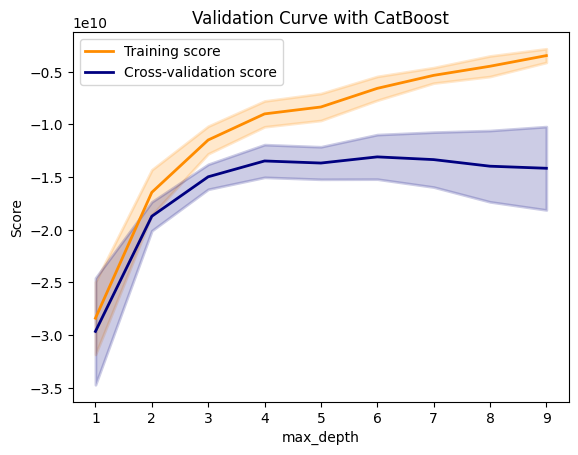

In [118]:
# make a validation curve from train_scores and test_scores
import matplotlib.pyplot as plt
import numpy as np

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with CatBoost")
plt.xlabel("max_depth")
plt.ylabel("Score")
#plt.ylim(-1, 0)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                color="navy", lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,   
                    test_scores_mean + test_scores_std, alpha=0.2,
                    color="navy", lw=lw)
plt.legend(loc="best")

In [119]:
# set max_depth to 4
cr2_4 = catboost.CatBoostRegressor(iterations=3000, learning_rate=0.1,
                                max_depth=4)

X_train, X_test, y_train, y_test = train_test_split(raw.drop('price'), y, 
                                                    test_size=0.2, random_state=42)

cr2_4.fit(X_train.to_pandas(), y_train.to_numpy(), cat_features=['zipcode'], verbose=100,
        early_stopping_rounds=10, eval_set=(X_test.to_pandas(), y_test.to_numpy()))
cr2_4.score(X_test.to_pandas(), y_test.to_numpy())

0:	learn: 341570.5994602	test: 368041.6290994	best: 368041.6290994 (0)	total: 4.98ms	remaining: 14.9s
100:	learn: 117424.7526864	test: 143390.6149138	best: 143390.6149138 (100)	total: 458ms	remaining: 13.2s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 137942.8426
bestIteration = 171

Shrink model to first 172 iterations.


0.8741325463996936


## Grid Search


In [120]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
dt_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                      ('dt', dt),
                      ])

dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)

0.7375555846171303

In [121]:
dt_pipe

Pipeline(steps=[('tweak',
                 FunctionTransformer(func=<function tweak_housing at 0x77e1e6df40e0>)),
                ('zip_avg_price', ZipAvgPriceAdder()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15', 'zip_mean']),
                                                 ('cat',
                                                  Pipeline(steps=[('one',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['zipcode'])])),
                ('dt', DecisionTreeRegressor())])

In [122]:
# use grid search on decision tree
from sklearn.model_selection import GridSearchCV

param_grid = {
    'dt__max_depth': [3, 6, 9],
    'dt__min_samples_split': [10, 20, 100],
    'dt__min_samples_leaf': [10, 20, 100],
}

grid_search = GridSearchCV(dt_pipe, param_grid, cv=5)#, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tweak',
                                        FunctionTransformer(func=<function tweak_housing at 0x77e1e6df40e0>)),
                                       ('zip_avg_price', ZipAvgPriceAdder()),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['bedrooms',
                                                                          'bathrooms',
                                                                          'sqft_living',
                                                                          'sqft_lot...
                                                                          'sqft_above',
                                                                          'sqft_basement',
                                                                          'yr_built',
                                                                          'yr_renovated',
                                                                          'lat',
                                                                          'long',
                                                                          'sqft_living15',
                                                                          'sqft_lot15',
                                                                          'zip_mean']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['zipcode'])])),
                                       ('dt', DecisionTreeRegressor())]),
             param_grid={'dt__max_depth': [3, 6, 9],
                         'dt__min_samples_leaf': [10, 20, 100],
                         'dt__min_samples_split': [10, 20, 100]})

In [123]:
grid_search.best_params_

{'dt__max_depth': 9, 'dt__min_samples_leaf': 10, 'dt__min_samples_split': 10}

In [124]:
# make a tree from the params
dt = DecisionTreeRegressor()#max_depth=9, min_samples_leaf=20, min_samples_split=10)
dt_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('to_pandas', pandas_transformer),
                      ('preprocessor', preprocessor),
                        ('dt', dt),
                      ])
dt_pipe.set_params(**grid_search.best_params_)
dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)

0.7973065250192581

In [125]:
# compare to default
dt = DecisionTreeRegressor(random_state=42)
dt_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('to_pandas', pandas_transformer),
                      ('preprocessor', preprocessor),
                        ('dt', dt),
                      ])

dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)

0.7430640561235218


## Challenge

Do a grid search to find the best depth for the random forest model. What is the best depth? What is the score of the model with the best depth?

In [127]:
param_grid = {
    'rf__max_depth': [1, 3, 5, 7, 9],
    'rf__n_estimators':[10, 15, 20, 25]
}

grid_search = GridSearchCV(rf_pipe, param_grid, cv=5)#, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tweak',
                                        FunctionTransformer(func=<function tweak_housing at 0x77e1e6df40e0>)),
                                       ('zip_avg_price', ZipAvgPriceAdder()),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['bedrooms',
                                                                          'bathrooms',
                                                                          'sqft_living',
                                                                          'sqft_lot...
                                                                          'view',
                                                                          'condition',
                                                                          'grade',
                                                                          'sqft_above',
                                                                          'sqft_basement',
                                                                          'yr_built',
                                                                          'yr_renovated',
                                                                          'lat',
                                                                          'long',
                                                                          'sqft_living15',
                                                                          'sqft_lot15',
                                                                          'zip_mean']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['zipcode'])])),
                                       ('rf', RandomForestRegressor())]),
             param_grid={'rf__max_depth': [1, 3, 5, 7, 9],
                         'rf__n_estimators': [10, 15, 20, 25]})

In [128]:
grid_search.best_params_

{'rf__max_depth': 9, 'rf__n_estimators': 20}

In [ ]:
# make a forest from the best params
rf_pipe.set_params(**grid_search.best_params_)
rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_test, y_test)

0.8530234080251062

In [130]:
# compare to default
rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_test, y_test)

0.8488397690795618

## Using MLFlow

Going to show how to persist and load a model, but can also:

- Start a endpoint to serve predictions
- Build a Docker image


In [13]:
import mlflow

In [14]:
mlflow.__version__

'2.11.3'

In [15]:
model_lr = mlflow.sklearn.log_model(lr_pipe, artifact_path='lr_pipe')

In [16]:
model_lr.artifact_path    

'lr_pipe'

In [17]:
!tree

.
├── CONTRIBUTING.md
├── LICENSE
├── NOTICE
├── README.md
├── catboost_info
│   ├── catboost_training.json
│   ├── learn
│   │   └── events.out.tfevents
│   ├── learn_error.tsv
│   ├── test
│   │   └── events.out.tfevents
│   ├── test_error.tsv
│   ├── time_left.tsv
│   └── tmp
├── ml-foundations.ipynb
├── mlruns
│   └── 0
│       ├── b51056ac503a43f0a725c522dacf8bc6
│       │   ├── artifacts
│       │   │   └── lr_pipe
│       │   │       ├── MLmodel
│       │   │       ├── conda.yaml
│       │   │       ├── metadata
│       │   │       │   ├── MLmodel
│       │   │       │   ├── conda.yaml
│       │   │       │   ├── python_env.yaml
│       │   │       │   └── requirements.txt
│       │   │       ├── model.pkl
│       │   │       ├── python_env.yaml
│       │   │       └── requirements.txt
│       │   ├── meta.yaml
│       │   ├── metrics
│       │   ├── params
│       │   └── tags
│       │       ├── mlflow.log-model.history
│       │       ├── mlflow.runName
│       │       ├── ml

In [18]:
model_lr.run_id

'b51056ac503a43f0a725c522dacf8bc6'

In [19]:
model1 = mlflow.pyfunc.load_model(f'mlruns/0/{model_lr.run_id}/artifacts/lr_pipe')

In [20]:
model1

mlflow.pyfunc.loaded_model:
  artifact_path: lr_pipe
  flavor: mlflow.sklearn
  run_id: b51056ac503a43f0a725c522dacf8bc6

In [21]:
model1.predict(X_test)

/tmp/ipykernel_16218/750729455.py:61: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  return X.join(self.zip_avg_price, on='zipcode')


array([[ 371616.],
       [ 828514.],
       [1240944.],
       ...,
       [ 380892.],
       [ 665852.],
       [ 384176.]])

## Challenge

Reformat your notebook so that you can load the data and create an optimized random forest model in a single cell. Then, use MLFlow to log the model and its parameters.

In [31]:
model_rf = mlflow.sklearn.log_model(rf_pipe, artifact_path='rf_pipe')

In [32]:
model_rf.artifact_path

'rf_pipe'

In [33]:
model_rf.run_id

'b51056ac503a43f0a725c522dacf8bc6'

In [34]:
model2 = mlflow.pyfunc.load_model(f'mlruns/0/{model_rf.run_id}/artifacts/rf_pipe')

In [35]:
model2

mlflow.pyfunc.loaded_model:
  artifact_path: rf_pipe
  flavor: mlflow.sklearn
  run_id: b51056ac503a43f0a725c522dacf8bc6

In [36]:
model2.predict(X_test)

/tmp/ipykernel_16218/750729455.py:61: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  return X.join(self.zip_avg_price, on='zipcode')


array([ 346115.03999451,  741881.99282484, 1054213.24169979, ...,
        325197.77806469,  617376.28658437,  325197.77806469])